# 📊 Quote-to-Cash Workflow Audit

This notebook explores a mock Quote-to-Cash (QTC) workflow using synthetic datasets inspired by real-world systems:
- **Salesforce Opportunities** for sales pipeline management
- **Zuora Subscriptions** for billing operations
- **RevPro Revenue** for financial recognition

We'll join and analyze these datasets to understand the lifecycle from sales opportunity to recognized revenue.

## 📦 Load Data
We begin by loading three datasets from an Excel file:
- `salesforce_opportunities`
- `zuora_subscriptions`
- `revpro_revenue`

Each sheet represents a different system in the QTC process.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dataframe_tools import DataFrameInspector  # Custom class for summarizing dataframes

In [2]:
excel_file = 'Quote-to-Cash Mock Data.xlsx'
dfs = pd.read_excel(excel_file, sheet_name=None)
df_opps = dfs['salesforce_opportunities']
df_subs = dfs['zuora_subscriptions']
df_rev = dfs['revpro_revenue']

## 🧾 Inspect Each Dataset
We'll use the `DataFrameInspector` utility to summarize column-level information for each dataset.

In [3]:
df_opps_summary = DataFrameInspector(df_opps).generate_summary()
df_subs_summary = DataFrameInspector(df_subs).generate_summary()
df_rev_summary = DataFrameInspector(df_rev).generate_summary()

### 🔍 Salesforce Opportunities Summary

In [4]:
df_opps_summary

,Column,Data Type,Missing Values,Unique Values,Unique Examples,Min,25%,50%,75%,Max,Mean,Std Dev
0,opportunity_id,object,0,500,"OPP001, OPP002, OPP003, OPP004, OPP005, OPP006...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,account_id,object,0,500,"ACCT001, ACCT002, ACCT003, ACCT004, ACCT005, A...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,created_at,datetime64[ns],0,155,"2025-03-13 00:00:00, 2025-02-17 00:00:00, 2025...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,stage,object,0,2,"Closed Won, Closed Lost",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,amount,float64,205,2,"59.99, 29.99",29.99,29.99,29.99,59.99,59.99,42.19339,14.762035
5,closed_won_at,datetime64[ns],205,134,"2025-03-19 00:00:00, 2025-03-04 00:00:00, 2025...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 🔍 Zuora Subscriptions Summary

In [5]:
df_subs_summary

,Column,Data Type,Missing Values,Unique Values,Unique Examples,Min,25%,50%,75%,Max,Mean,Std Dev
0,subscription_id,object,0,295,"SUB001, SUB002, SUB003, SUB004, SUB005, SUB006...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,opportunity_id,object,0,295,"OPP001, OPP002, OPP003, OPP004, OPP005, OPP007...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,start_date,datetime64[ns],0,141,"2025-03-30 00:00:00, 2025-03-19 00:00:00, 2025...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,end_date,datetime64[ns],0,141,"2026-03-30 00:00:00, 2026-03-19 00:00:00, 2026...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,billing_status,object,0,2,"Active, Suspended",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,invoice_count,int64,0,7,"3, 4, 1, 5, 2, 0, 6",0.0,2.0,3.0,4.0,6.0,2.877966,1.564494


### 🔍 RevPro Revenue Summary

In [6]:
df_rev_summary

,Column,Data Type,Missing Values,Unique Values,Unique Examples,Min,25%,50%,75%,Max,Mean,Std Dev
0,subscription_id,object,0,295,"SUB001, SUB002, SUB003, SUB004, SUB005, SUB006...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,recognized_amount,float64,0,2,"47.992, 23.992",23.992,23.992,23.992,47.992,47.992,33.754712,11.809628
2,recognition_date,datetime64[ns],0,146,"2025-04-04 00:00:00, 2025-03-28 00:00:00, 2025...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,status,object,0,2,"Recognized, Pending",NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 🔗 Join the Data
We'll now merge the datasets to build a unified view of each opportunity's path from sales to subscription to revenue.

In [7]:
df = df_opps.merge(df_subs, on='opportunity_id', how='left', suffixes=('_opps', '_subs'))
df = df.merge(df_rev, on='subscription_id', how='left')
df.head()

,opportunity_id,account_id,created_at,stage,amount,closed_won_at,subscription_id,start_date,end_date,billing_status,invoice_count,recognized_amount,recognition_date,status
0,OPP001,ACCT001,2025-03-13,Closed Won,59.99,2025-03-19,SUB001,2025-03-30,2026-03-30,Active,3.0,47.992,2025-04-04,Recognized
1,OPP002,ACCT002,2025-02-17,Closed Won,59.99,2025-03-04,SUB002,2025-03-19,2026-03-19,Active,3.0,47.992,2025-03-28,Recognized
2,OPP003,ACCT003,2025-02-12,Closed Won,29.99,2025-02-24,SUB003,2025-03-05,2026-03-05,Active,4.0,23.992,2025-03-12,Recognized
3,OPP004,ACCT004,2025-01-17,Closed Won,29.99,2025-02-06,SUB004,2025-02-20,2026-02-20,Active,4.0,23.992,2025-02-28,Recognized
4,OPP005,ACCT005,2025-02-17,Closed Won,29.99,2025-03-14,SUB005,2025-03-26,2026-03-26,Active,3.0,23.992,2025-04-04,Recognized


## 🔄 Conversion Rate
Let's calculate the share of opportunities that successfully converted into subscriptions.

In [8]:
df['has_subscription'] = df['subscription_id'].notnull()
conversion_rate = df['has_subscription'].mean()
print(f"Subscription Conversion Rate: {conversion_rate:.2%}")

Subscription Conversion Rate: 59.00%


## 🕒 Time Durations
For opportunities that have data in all stages of the workflow, we'll calculate key time durations:
- Days from opportunity creation to close (`days_to_close`)
- Days from opportunity close to subscription start (`days_to_start`)
- Days from subscription start to revenue recognition (`days_to_revenue`)

In [9]:
df = df.dropna().copy()
df['days_to_close'] = (df['closed_won_at'] - df['created_at']).dt.days
df['days_to_start'] = (df['start_date'] - df['closed_won_at']).dt.days
df['days_to_revenue'] = (df['recognition_date'] - df['start_date']).dt.days
df[['days_to_close', 'days_to_start', 'days_to_revenue']].describe()

,days_to_close,days_to_start,days_to_revenue
count,295.00000,295.000000,295.000000
mean,14.60678,10.206780,8.115254
std,9.22146,3.724522,1.433422
min,0.00000,0.000000,5.000000
25%,6.00000,8.000000,7.000000
50%,15.00000,11.000000,8.000000
75%,23.00000,13.000000,9.000000
max,30.00000,15.000000,10.000000


## 📈 Workflow Timeline Distributions
Now let’s visualize the distribution of durations in each stage.

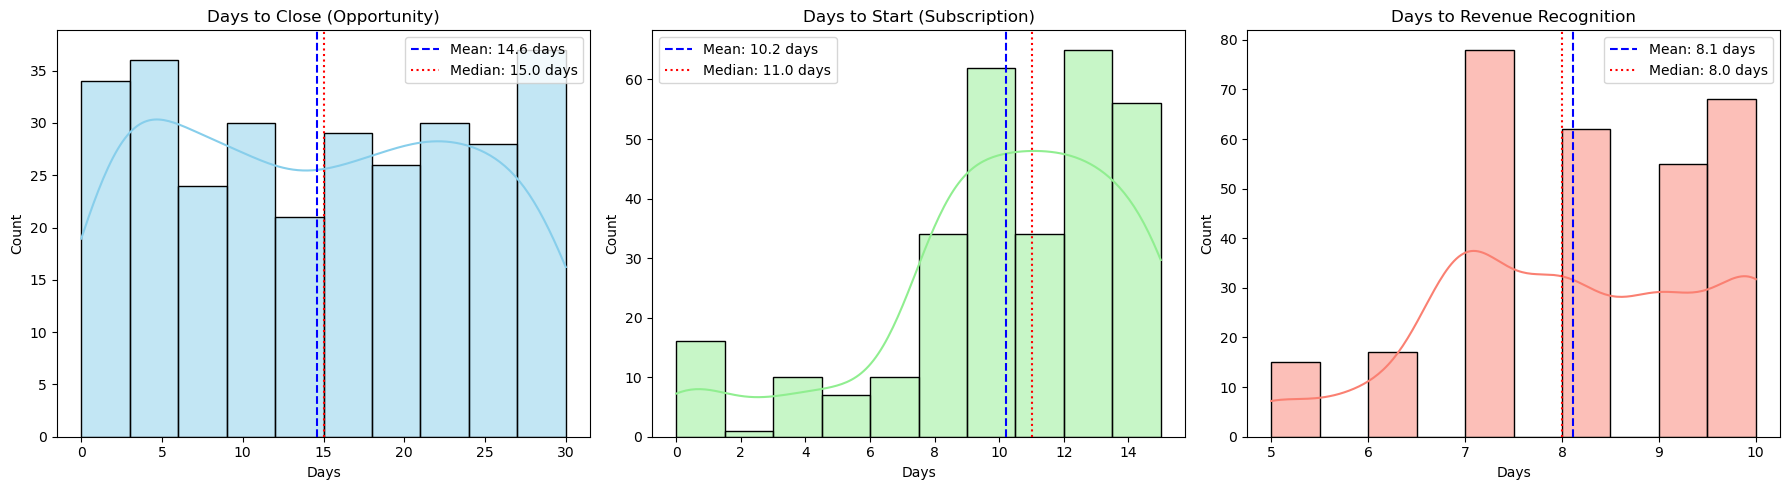

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['days_to_close', 'days_to_start', 'days_to_revenue']
titles = ['Days to Close (Opportunity)', 'Days to Start (Subscription)', 'Days to Revenue Recognition']
colors = ['skyblue', 'lightgreen', 'salmon']

for ax, metric, title, color in zip(axes, metrics, titles, colors):
    sns.histplot(df[metric], kde=True, ax=ax, color=color, edgecolor='black')

    # Calculate mean and median
    mean_val = df[metric].mean()
    median_val = df[metric].median()

    # Plot vertical lines
    ax.axvline(mean_val, color='blue', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.1f} days')
    ax.axvline(median_val, color='red', linestyle=':', linewidth=1.5, label=f'Median: {median_val:.1f} days')

    # Labels and formatting
    ax.set_title(title)
    ax.set_xlabel("Days")
    ax.set_ylabel("Count")
    ax.legend()

plt.tight_layout()
plt.show()

## ✅ Wrap Up
With this, we have a strong start on a quote-to-cash analysis. We can already see there might be some room for improvement in the subscription and revenue recognition pipelines. Some next steps that would be worth taking on live data:
- Outlier detection
- Aggregated revenue over time
- Comparison of active vs suspended subscriptions
- Simulation of how delays in one stage impact downstream metrics